In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'C:\\Users\\vsaal\\Documents\\kaggle\\titanic'

In [201]:
df=pd.read_csv('train.csv')
df_teste=pd.read_csv('test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

survival - Survival (0 = No; 1 = Yes)

class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

boat - Lifeboat (if survived)

body - Body number (if did not survive and body was recovered)

In [202]:
df.shape, df_teste.shape

((891, 12), (418, 11))

In [203]:
df.info(), df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

(None, None)

In [204]:
df.describe(), df_teste.describe()

(       PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  714.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.699118    0.523008   
 std     257.353842    0.486592    0.836071   14.526497    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   20.125000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   38.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std      0.806057   49.693429  
 min      0.000000    0.000000  
 25%      0.000000    7.910400  
 50%      0.000000   14.454200  
 75%      0.000000   31.000000  
 max      6.000000  512.329200  ,
        PassengerId      Pclass         Age       SibSp      

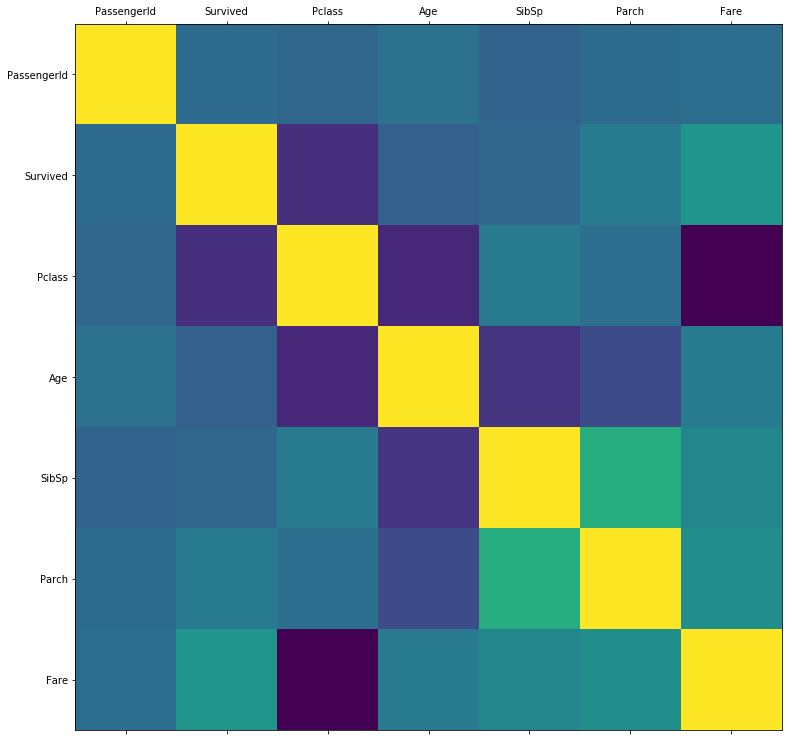

In [68]:
def corr_variaveis(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(13,13))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
corr_variaveis(df)

In [84]:
gender_survival=df.groupby('Sex').Survived.mean()
print('{0:.2f}% of men survived'.format(gender_survival[0]*100))
print('{0:.2f}% of women survived'.format(gender_survival[1]*100))

18.89% of men survived
74.20% of women survived


In [130]:
class_survival=df.groupby('Pclass', as_index=True).Survived.mean()
print('{0:.2f}% of first class survived'.format(class_survival[1]*100))
print('{0:.2f}% of second class survived'.format(class_survival[2]*100))
print('{0:.2f}% of third class survived'.format(class_survival[3]*100))

62.96% of first class survived
47.28% of second class survived
24.24% of third class survived


In [103]:
#Now to unify these two analysis
class_gender_survival=df.groupby(['Pclass', 'Sex']).Survived.mean()
print('{0:.2f}% of men in first class survived'.format(class_gender_survival[1,0]*100))
print('{0:.2f}% of women in first class survived\n'.format(class_gender_survival[1,1]*100))

print('{0:.2f}% of men in second class survived'.format(class_gender_survival[2,0]*100))
print('{0:.2f}% of women in second class survived\n'.format(class_gender_survival[2,1]*100))

print('{0:.2f}% of men in third class survived'.format(class_gender_survival[3,0]*100))
print('{0:.2f}% of women in third class survived'.format(class_gender_survival[3,1]*100))

36.89% of men in first class survived
96.81% of women in first class survived

15.74% of men in second class survived
92.11% of women in second class survived

13.54% of men in third class survived
50.00% of women in third class survived


In [121]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [129]:
df.groupby('Embarked').PassengerId.count().sort_values(ascending=False)

Embarked
S    644
C    168
Q     77
Name: PassengerId, dtype: int64

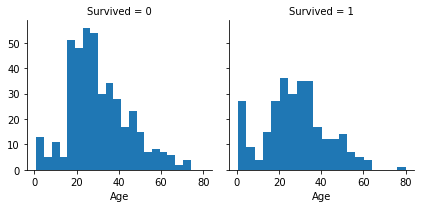

In [112]:
age_survived = sns.FacetGrid(df, col='Survived')
age_survived.map(plt.hist, 'Age', bins=20)
#Distribution of age by survival

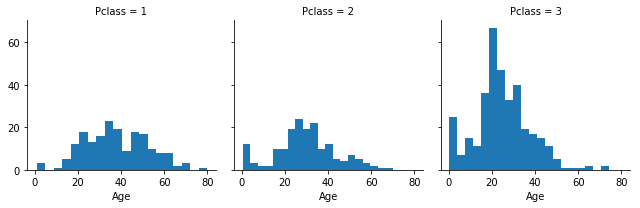

In [111]:
grid = sns.FacetGrid(df, col='Pclass')
grid.map(plt.hist, 'Age', bins=20)
#Distribution of age by Class

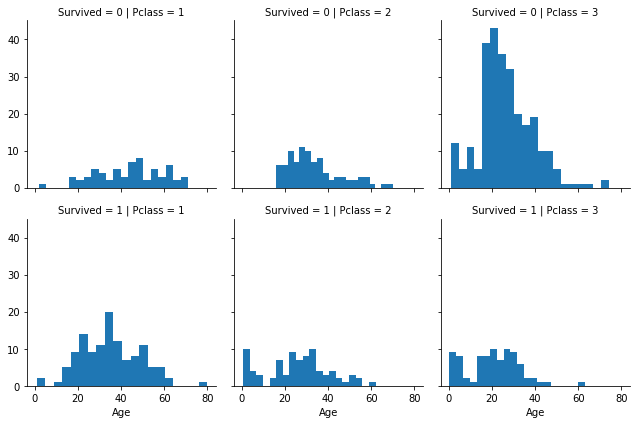

In [113]:
grid = sns.FacetGrid(df, col='Pclass', row='Survived')
grid.map(plt.hist, 'Age', bins=20)
#Distribution of age by Class

This distribution shows us quite a few interesting points. Frist, passangers in third class were the most volumous ones.

Another interesting factor is that first class is the only one with an expressive amount ou passangers over 40 yo.


Now I'll begin to transform the DFs

In [200]:
#Transform sex variable into a numerical one
sexo={'male':0, 'female':1}
df.Sex=df.Sex.map(sexo)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cod_cabine,indice_fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2.0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2.0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,NaN,"(7.91, 14.454]"


In [159]:
df.Names=df.Name.str.extract('([A-Za-z]+\.)')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [177]:
df[['Ticket', 'Survived']].groupby('Ticket', as_index=True).mean().head()

,Survived
Ticket,
110152,1.000000
110413,0.666667
110465,0.000000
110564,1.000000
110813,1.000000


In [185]:
df[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [ ]:
Large families had lesser chances of survival

In [186]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [193]:
df['cod_cabine']=df.Cabin.str.extract('([A-Za-z])')
codigos={'A':0, 'B':1, 'C':2, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8}
df.cod_cabine=df.cod_cabine.map(codigos)

In [194]:
df[['cod_cabine', 'Survived']].groupby('cod_cabine').mean()

,Survived
cod_cabine,
0.0,0.466667
1.0,0.744681
2.0,0.593220
4.0,0.757576
5.0,0.750000
6.0,0.615385
7.0,0.500000
8.0,0.000000


In [195]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cod_cabine
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [199]:
df['indice_fare']=pd.qcut(df.Fare, q=4)
df[['indice_fare', 'Survived']].groupby('indice_fare').mean().sort_values(by='indice_fare', ascending=False)

,Survived
indice_fare,
"(31.0, 512.329]",0.581081
"(14.454, 31.0]",0.454955
"(7.91, 14.454]",0.303571
"(-0.001, 7.91]",0.197309


In [271]:
class Solution:
    def corpFlightBookings(self, bookings: List[List[int]], n: int) -> List[int]:
        seats=[]
        for purchase in bookings:
            for value in range(purchase[0],purchase[1]):
                print(value)


NameError: name 'List' is not defined

In [312]:
Input: nums = [1,2,3,4]
Output: [2,4,4,4]

NameError: name 'nums' is not defined

In [335]:
nums = [1,2,3,4,5,6]

In [342]:
class Solution:
    def decompressRLElist(self, nums: list[int]) -> list[int]:
        from numpy import repeat
        lista=[((a), (a+1)) for a in nums[::2]]
        saida=[]
        for a,b in lista:
            list.append(repeat(b,a))
        return list

TypeError: 'type' object is not subscriptable

In [340]:
variavel=Solition()
variavel.decompressRLElist(nums = [1,2,3,4, 6, 4])

NameError: name 'Solition' is not defined

In [392]:
def decompressRLElist(nums):
        lista=list(zip(*[iter(nums)]*2))
        saida=[]
        for a,b in lista:
            for i in range (a):
                saida.append(b)
        return saida

In [393]:
decompressRLElist(nums = [3,2])

[2, 2, 2]

In [367]:
nums=[1,2,3,4,6,5]
print(nums)
print([(a for a in range(len(nums)))])

[1, 2, 3, 4, 6, 5]
[<generator object <genexpr> at 0x00000205F5FDBF48>]


In [391]:
a=list(zip(*[iter(nums)]*2))
for i,j in a:
    print(i)

1
3
6


In [385]:
list(zip(inter(nums), inter(nums)))

NameError: name 'inter' is not defined

In [30]:
def sumZero(n: int):
    from random import sample
    result=[]
    result.extend((sample(range(-n, n), n-1)))
    #result.append(value)
    result.append(0-sum(result))
    return result


In [39]:
sumZero(3)

[2, -3, 1]

In [29]:
from random import sample
n=10
a=[]
a.extend((sample(range(-n, n), n-1)))
a.append(99)
a

[2, 1, -3, 9, -4, 7, -10, 5, -8, 99]

In [43]:
n=100
def getNoZeroIntegers(n):
    a=n-1
    b=1
    while str(a).count('0')>0 or str(b).count('0')>0:
        a-=1
        b+=1
    return [a,b]

def changenumber(n):
    a=n-1
    b=1
    if str(a).count('0')>0 or str(b).count('0')>0:
        a-=1
        b+=1
        return a,b

In [47]:
%time getNoZeroIntegers(1010110001001)

KeyboardInterrupt: 

In [108]:
num=69696
def maximum69Number(num):
    result=0
    unique=1
    power=int(len(str(num)))
    factor=1
    for position in str(num):
        if position=='6' and unique==1:
            result+=9*10**(power-factor)
            unique=0
            factor+=1
        else:
            result+=int(position)*10**(power-factor)
            factor+=1
    return (result)

In [109]:
maximum69Number(num)

99696

In [110]:
def isValid(s: str) -> bool:
    parentesis=0
    chave=0
    braquete=0
    for letra in s:
        if letra =='(':
            parentesis+=1
        if letra==')':
            parentesis-=1
        if letra=='{':
            chave+=1
        if letra=='}':
            chave-=1
        if letra=='[':
            braquete+=1
        if letra==']':
            braquete-=1
    if parentesis==0 and chave==0 and braquete==0:
        return True
    else:
        return False

In [113]:
isValid("([)]")

True

In [13]:
dict = {'k1':'martelo', 'k2':'serrote', 'k3':'machado'}
dict['k4'] = 'parafuso'
print(dict)

{'k1': 'martelo', 'k2': 'serrote', 'k3': 'machado', 'k4': 'parafuso'}


In [ ]:
from sklearn.model_selection import train_test_split